# Experiments with EPRL Melon extrapolation

In [65]:
# set Plot style
using Plots
using Plots.PlotMeasures
using LaTeXStrings

# set backend and style
pgfplotsx()
theme(:default)
default(
    markerstrokewidth = 0.2,
    markerstrokealpha = 0,
    grid = :true,
    gridlinewidth = 0.5,
    fontfamily="Computer Modern",
    framestyle=:box,
    size=(800,300),
    margin=5Plots.mm
)
scalefontsizes(1.7)

In [66]:
using CSV, DataFrames, HalfIntegers, JupyterFormatter

In [67]:
DIAGRAM = "self_energy";
BASE_DATA_DIRECTORY = "../../data";
MODEL = "EPRL";

In [68]:
function get_data(filename)

    data = vec(
        Matrix(
            DataFrame(
                CSV.File(
                    "$(BASE_DATA_DIRECTORY)/$(DIAGRAM)/jb_0.5/exact/$(MODEL)/immirzi_0.1/NEW_EXTRAPOLATION/Dl_MAX_10/$(filename).csv",
                ),
            ),
        ),
    )

    data

end

get_data (generic function with 1 method)

In [69]:
W_Dl = get_data("Dl_cutoff_10")
W_Dl_m1 = get_data("Dlm1_cutoff_10")
W_Dl_m2 = get_data("Dlm2_cutoff_10")

W_1 = get_data("W1_cutoff_10")
W_2 = get_data("W2_cutoff_10")
W_3_10_shell = get_data("W3_cutoff_10")
W_4_10_shell = get_data("W4_cutoff_10");

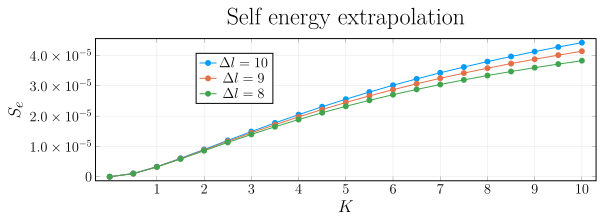

In [70]:
plotib0 = plot(
    0.0:0.5:10,
    [W_Dl[:], W_Dl_m1[:], W_Dl_m2[:]],
    label = [L"\Delta l = 10" L"\Delta l = 9" L"\Delta l = 8"],
    xlabel = L"K",
    ylabel = L"S_e",
    title = ["Self energy extrapolation"],
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 1:1:10,
    legend = (0.2, 0.9),
)

In [71]:
data_20_shell = Matrix(DataFrame(CSV.File("Divergences_table_imm_0.1_20_SHELLS.csv")));

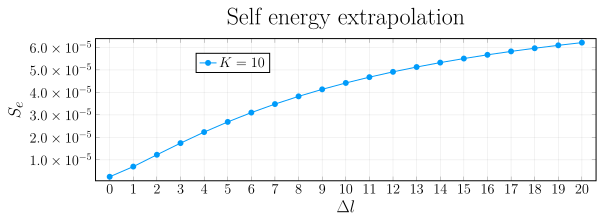

In [72]:
plotib0 = plot(
    0.0:20.0,
    data_20_shell[20,:],
    label = [L"K=10"],
    xlabel = L"\Delta l",
    ylabel = L"S_e",
    title = ["Self energy extrapolation"],
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 0:1:20,
    legend = (0.2, 0.9),
)

In [73]:
lambda20 = (data_20_shell[20,3:end] .- data_20_shell[20,2:end-1]) ./ (data_20_shell[20,2:end-1] .- data_20_shell[20,1:end-2])
lambda15 = (data_20_shell[15,3:end] .- data_20_shell[15,2:end-1]) ./ (data_20_shell[15,2:end-1] .- data_20_shell[15,1:end-2])
lambda10 = (data_20_shell[10,3:end] .- data_20_shell[10,2:end-1]) ./ (data_20_shell[10,2:end-1] .- data_20_shell[10,1:end-2])

19-element Vector{Float64}:
 1.0458581673919574
 0.885601756909979
 0.8615324593323087
 0.8449690033231178
 0.8470759839398041
 0.8468137051543329
 0.8525321888999506
 0.8557796693110916
 0.86172843691349
 0.8657263511314749
 0.8711939924500222
 0.8751560894112997
 0.8800215385011394
 0.8837101527279319
 0.8880031716063286
 0.891360183182598
 0.8951481010517416
 0.8981782983289348
 0.9015314008368358

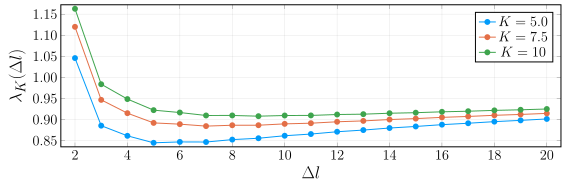

In [82]:
plotib0 = plot(
    2.0:20.0,
    [   lambda10,
        lambda15,
        lambda20,
    ],
    label = [ L"K=5.0" L"K=7.5" L"K=10"],
    xlabel = L"\Delta l",
    ylabel = L"\lambda_K(\Delta l)",
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 0:2:20,
    legend = (0.828, 0.95),
)

In [75]:
extrapolation20 = (data_20_shell[:, 21] .* data_20_shell[:, 19] .- data_20_shell[:, 20] .^2)./(data_20_shell[:, 21] .- 2*data_20_shell[:, 20] .+  data_20_shell[:, 19])
extrapolation10 = (data_20_shell[:, 11] .* data_20_shell[:, 9] .- data_20_shell[:, 10] .^2)./(data_20_shell[:, 11] .- 2*data_20_shell[:, 10] .+  data_20_shell[:, 9])

20-element Vector{Float64}:
 1.0901759030541198e-6
 3.4526168115882948e-6
 6.466506719088954e-6
 9.781897052829195e-6
 1.3320402605375727e-5
 1.6977853570635834e-5
 2.0735554361923632e-5
 2.455048068622137e-5
 2.8419048261942677e-5
 3.232091239873429e-5
 3.62574650546916e-5
 4.021840726433414e-5
 4.420680917342584e-5
 4.821729502158238e-5
 5.225337685541656e-5
 5.631226388053655e-5
 6.039743020928723e-5
 6.450751472479897e-5
 6.86457782925542e-5
 7.281168446274251e-5

In [76]:
extrapolation20[end]/extrapolation10[end]

1.0571725127166525

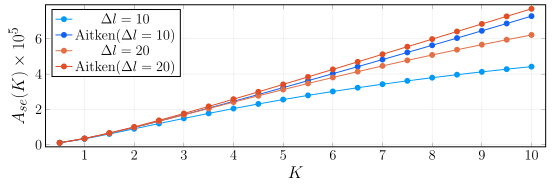

In [77]:
plotib0 = plot(
    0.5:0.5:10.0,
    [10^5 .*data_20_shell[:, 11],
    10^5 .*extrapolation10,
     10^5 .*data_20_shell[:, 21],
     10^5 .*extrapolation20],
    label = [L"\Delta l =10" L"\mathrm{Aitken} (\Delta l =10)" L"\Delta l =20" L"\mathrm{Aitken} (\Delta l =20)"],
    xlabel = L"K",
    ylabel = L"A_{se}(K) \times 10^5",
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 0:1:10,
    legend = (0.012, 0.97),
    seriescolor = [palette(:default)[1] RGBA(16.0/255,96.0/255,244.0/255,1) palette(:default)[2] RGBA(226.0/255,77.0/255,36.0/255,1)],
)

In [95]:
data_20_shell[end, 21]

6.21533746467451e-5

In [89]:
extrapolation20[end]/extrapolation10[end]

1.0571725127166525

In [145]:
# difference of amplitudes at finite Dl

layersDL20 = zeros(21)
layersDL19 = zeros(21)
layersDL18 = zeros(21)
layersDL17 = zeros(21)
layersDL16 = zeros(21)
layersDL15 = zeros(21)
layersDL14 = zeros(21)
layersDL13 = zeros(21)
layersDL12 = zeros(21)
layersDL11 = zeros(21)
layersDL10 = zeros(21)
layersDL9 = zeros(21)
layersDL8 = zeros(21)
layersDL7 = zeros(21)
layersDL6 = zeros(21)
layersDL5 = zeros(21)
layersDL4 = zeros(21)
layersDL3 = zeros(21)
layersDL2 = zeros(21)
layersDL1 = zeros(21)
layersDL0 = zeros(21)

layersDL20[1] = 0.0
layersDL19[1] = 0.0
layersDL18[1] = 0.0
layersDL17[1] = 0.0
layersDL16[1] = 0.0
layersDL15[1] = 0.0
layersDL14[1] = 0.0
layersDL13[1] = 0.0
layersDL12[1] = 0.0
layersDL11[1] = 0.0
layersDL10[1] = 0.0
layersDL9[1] = 0.0
layersDL8[1] = 0.0
layersDL7[1] = 0.0
layersDL6[1] = 0.0
layersDL5[1] = 0.0
layersDL4[1] = 0.0
layersDL3[1] = 0.0
layersDL2[1] = 0.0
layersDL1[1] = 0.0
layersDL0[1] = 0.0

layersDL20[2] = data_20_shell[1, 21]
layersDL19[2] = data_20_shell[1, 20]
layersDL18[2] = data_20_shell[1, 19]
layersDL17[2] = data_20_shell[1, 20]
layersDL16[2] = data_20_shell[1, 19]
layersDL15[2] = data_20_shell[1, 20]
layersDL14[2] = data_20_shell[1, 19]
layersDL13[2] = data_20_shell[1, 20]
layersDL12[2] = data_20_shell[1, 19]
layersDL11[2] = data_20_shell[1, 19]
layersDL10[2] = data_20_shell[1, 11]
layersDL9[2] = data_20_shell[1, 10]
layersDL8[2] = data_20_shell[1, 9]
layersDL7[2] = data_20_shell[1, 8]
layersDL6[2] = data_20_shell[1, 7]
layersDL5[2] = data_20_shell[1, 6]
layersDL4[2] = data_20_shell[1, 5]
layersDL3[2] = data_20_shell[1, 4]
layersDL2[2] = data_20_shell[1, 3]
layersDL1[2] = data_20_shell[1, 2]
layersDL0[2] = data_20_shell[1, 1]



layersDL20[3:end] = [data_20_shell[id, 21] - data_20_shell[id-1, 21] for id = 2:20]
layersDL19[3:end] = [data_20_shell[id, 20] - data_20_shell[id-1, 20] for id = 2:20]
layersDL18[3:end] = [data_20_shell[id, 19] - data_20_shell[id-1, 19] for id = 2:20]
layersDL17[3:end] = [data_20_shell[id, 18] - data_20_shell[id-1, 18] for id = 2:20]
layersDL16[3:end] = [data_20_shell[id, 17] - data_20_shell[id-1, 17] for id = 2:20]
layersDL15[3:end] = [data_20_shell[id, 16] - data_20_shell[id-1, 16] for id = 2:20]
layersDL14[3:end] = [data_20_shell[id, 15] - data_20_shell[id-1, 15] for id = 2:20]
layersDL13[3:end] = [data_20_shell[id, 14] - data_20_shell[id-1, 14] for id = 2:20]
layersDL12[3:end] = [data_20_shell[id, 13] - data_20_shell[id-1, 13] for id = 2:20]
layersDL11[3:end] = [data_20_shell[id, 12] - data_20_shell[id-1, 12] for id = 2:20]
layersDL10[3:end] = [data_20_shell[id, 11] - data_20_shell[id-1, 11] for id = 2:20]
layersDL9[3:end]  = [data_20_shell[id, 10] - data_20_shell[id-1, 10] for id = 2:20]
layersDL8[3:end]  = [data_20_shell[id,  9] - data_20_shell[id-1,  9] for id = 2:20]
layersDL7[3:end]  = [data_20_shell[id, 8] - data_20_shell[id-1, 8] for id = 2:20]
layersDL6[3:end]  = [data_20_shell[id, 7] - data_20_shell[id-1, 7] for id = 2:20]
layersDL5[3:end]  = [data_20_shell[id, 6] - data_20_shell[id-1, 6] for id = 2:20]
layersDL4[3:end]  = [data_20_shell[id, 5] - data_20_shell[id-1, 5] for id = 2:20]
layersDL3[3:end]  = [data_20_shell[id, 4] - data_20_shell[id-1, 4] for id = 2:20]
layersDL2[3:end]  = [data_20_shell[id, 3] - data_20_shell[id-1, 3] for id = 2:20]
layersDL1[3:end]  = [data_20_shell[id, 2] - data_20_shell[id-1, 2] for id = 2:20]
layersDL0[3:end]  = [data_20_shell[id, 1] - data_20_shell[id-1, 1] for id = 2:20]


In [146]:
layers_extrapolated_20 = zeros(21)

layers_extrapolated_20 .= (
    (layersDL20[:] .* layersDL18[:] .- layersDL19[:] .^ 2) ./
    (layersDL20[:] .- 2 .* layersDL19[:] .+ layersDL18[:])
);

layers_extrapolated_20[1] = 0.0;

amplitude_extrapolated_20 = zeros(21)

for k = 1:21
    amplitude_extrapolated_20[k] = sum(layers_extrapolated_20[1:k])
end

# --------------------------------

layers_extrapolated_19 = zeros(21)

layers_extrapolated_19 .= (
    (layersDL19[:] .* layersDL17[:] .- layersDL18[:] .^ 2) ./
    (layersDL19[:] .- 2 .* layersDL18[:] .+ layersDL17[:])
);

layers_extrapolated_19[1] = 0.0;

amplitude_extrapolated_19 = zeros(21)

for k = 1:21
    amplitude_extrapolated_19[k] = sum(layers_extrapolated_19[1:k])
end


# --------------------------------

layers_extrapolated_18 = zeros(21)

layers_extrapolated_18 .= (
    (layersDL18[:] .* layersDL16[:] .- layersDL17[:] .^ 2) ./
    (layersDL18[:] .- 2 .* layersDL17[:] .+ layersDL16[:])
);

layers_extrapolated_18[1] = 0.0;

amplitude_extrapolated_18 = zeros(21)

for k = 1:21
    amplitude_extrapolated_18[k] = sum(layers_extrapolated_18[1:k])
end


# --------------------------------

layers_extrapolated_17 = zeros(21)

layers_extrapolated_17 .= (
    (layersDL17[:] .* layersDL15[:] .- layersDL16[:] .^ 2) ./
    (layersDL17[:] .- 2 .* layersDL16[:] .+ layersDL15[:])
);

layers_extrapolated_17[1] = 0.0;

amplitude_extrapolated_17 = zeros(21)

for k = 1:21
    amplitude_extrapolated_17[k] = sum(layers_extrapolated_17[1:k])
end

# --------------------------------

layers_extrapolated_16 = zeros(21)

layers_extrapolated_16 .= (
    (layersDL16[:] .* layersDL14[:] .- layersDL15[:] .^ 2) ./
    (layersDL16[:] .- 2 .* layersDL15[:] .+ layersDL14[:])
);

layers_extrapolated_16[1] = 0.0;

amplitude_extrapolated_16 = zeros(21)

for k = 1:21
    amplitude_extrapolated_16[k] = sum(layers_extrapolated_16[1:k])
end

# --------------------------------

layers_extrapolated_15 = zeros(21)

layers_extrapolated_15 .= (
    (layersDL15[:] .* layersDL13[:] .- layersDL14[:] .^ 2) ./
    (layersDL15[:] .- 2 .* layersDL14[:] .+ layersDL13[:])
);

layers_extrapolated_15[1] = 0.0;

amplitude_extrapolated_15 = zeros(21)

for k = 1:21
    amplitude_extrapolated_15[k] = sum(layers_extrapolated_15[1:k])
end

# --------------------------------

layers_extrapolated_14 = zeros(21)

layers_extrapolated_14 .= (
    (layersDL14[:] .* layersDL12[:] .- layersDL13[:] .^ 2) ./
    (layersDL14[:] .- 2 .* layersDL13[:] .+ layersDL12[:])
);

layers_extrapolated_14[1] = 0.0;

amplitude_extrapolated_14 = zeros(21)

for k = 1:21
    amplitude_extrapolated_14[k] = sum(layers_extrapolated_14[1:k])
end

# --------------------------------

layers_extrapolated_13 = zeros(21)

layers_extrapolated_13 .= (
    (layersDL13[:] .* layersDL11[:] .- layersDL12[:] .^ 2) ./
    (layersDL13[:] .- 2 .* layersDL12[:] .+ layersDL11[:])
);

layers_extrapolated_13[1] = 0.0;

amplitude_extrapolated_13 = zeros(21)

for k = 1:21
    amplitude_extrapolated_13[k] = sum(layers_extrapolated_13[1:k])
end

# --------------------------------

layers_extrapolated_12 = zeros(21)

layers_extrapolated_12 .= (
    (layersDL12[:] .* layersDL10[:] .- layersDL11[:] .^ 2) ./
    (layersDL12[:] .- 2 .* layersDL11[:] .+ layersDL10[:])
);

layers_extrapolated_12[1] = 0.0;

amplitude_extrapolated_12 = zeros(21)

for k = 1:21
    amplitude_extrapolated_12[k] = sum(layers_extrapolated_12[1:k])
end

# --------------------------------

layers_extrapolated_11 = zeros(21)

layers_extrapolated_11 .= (
    (layersDL11[:] .* layersDL9[:] .- layersDL10[:] .^ 2) ./
    (layersDL11[:] .- 2 .* layersDL10[:] .+ layersDL9[:])
);

layers_extrapolated_11[1] = 0.0;

amplitude_extrapolated_11 = zeros(21)

for k = 1:21
    amplitude_extrapolated_11[k] = sum(layers_extrapolated_11[1:k])
end

# --------------------------------


layers_extrapolated_10 = zeros(21)

layers_extrapolated_10 .= (
    (layersDL10[:] .* layersDL8[:] .- layersDL9[:] .^ 2) ./
    (layersDL10[:] .- 2 .* layersDL9[:] .+ layersDL8[:])
);


layers_extrapolated_10[1] = 0.0;



amplitude_extrapolated_10 = zeros(21)

for k = 1:21
    amplitude_extrapolated_10[k] = sum(layers_extrapolated_10[1:k])
end

In [150]:
test = [amplitude_extrapolated_10[2:end], amplitude_extrapolated_11[2:end], amplitude_extrapolated_12[2:end], amplitude_extrapolated_13[2:end], amplitude_extrapolated_14[2:end], amplitude_extrapolated_15[2:end], amplitude_extrapolated_16[2:end], amplitude_extrapolated_17[2:end], amplitude_extrapolated_18[2:end], amplitude_extrapolated_19[2:end], amplitude_extrapolated_20[2:end]];

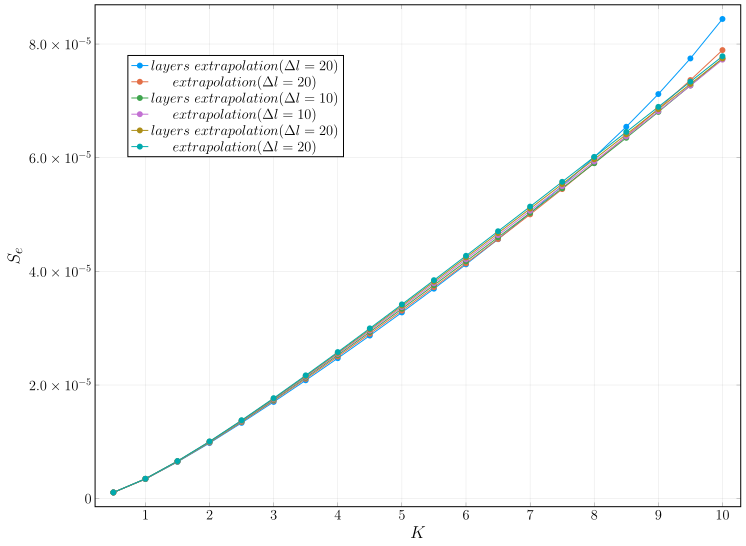

In [148]:
plotib0 = plot(
    0.5:0.5:10,
    [amplitude_extrapolated_10[2:end],amplitude_extrapolated_12[2:end], amplitude_extrapolated_14[2:end], amplitude_extrapolated_16[2:end], amplitude_extrapolated_18[2:end], amplitude_extrapolated_20[2:end]],
    label = [L"layers\ extrapolation(\Delta l = 20)" L"extrapolation(\Delta l = 20)" L"layers\ extrapolation(\Delta l = 10)" L"extrapolation(\Delta l = 10)"],
    xlabel = L"K",
    ylabel = L"S_e",
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 1:1:10,
    legend = (0.05, 0.9),
    size=(1000,800)
)

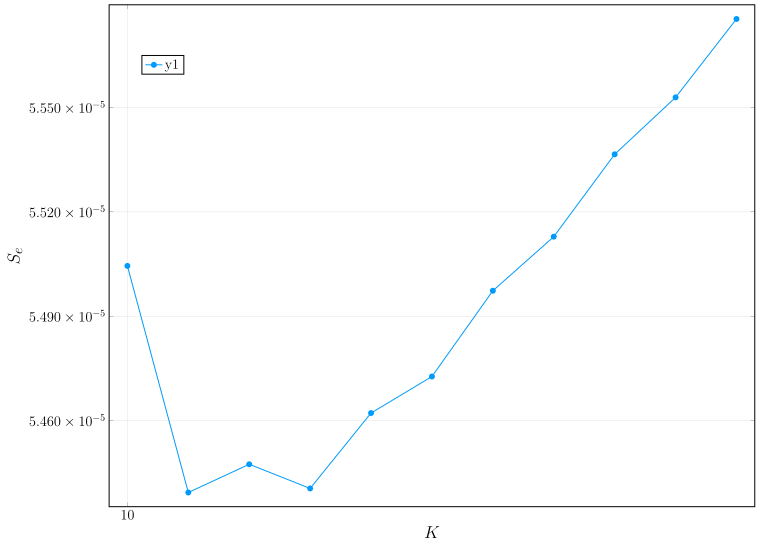

In [170]:
plotib0 = plot(
    10:20,
    [transpose_test[15]],
    xlabel = L"K",
    ylabel = L"S_e",
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 1:1:10,
    legend = (0.05, 0.9),
    size=(1000,800)
)

In [ ]:
data_20_shell[]

In [ ]:
lambda_layer_20 = (data_20_shell[20,3:end] .- data_20_shell[20,2:end-1]) ./ (data_20_shell[20,2:end-1] .- data_20_shell[20,1:end-2])
lambda_layer_15 = (data_20_shell[15,3:end] .- data_20_shell[15,2:end-1]) ./ (data_20_shell[15,2:end-1] .- data_20_shell[15,1:end-2])
lambda_layer_10 = (data_20_shell[10,3:end] .- data_20_shell[10,2:end-1]) ./ (data_20_shell[10,2:end-1] .- data_20_shell[10,1:end-2])

### Consistency check

Let's derive $W_3 (\Delta l_{max} = 10)$ from the data obtained one year ago, and compare it with the data just computed

In [13]:
Diff_10_shell = zeros(21)
Diff_9_shell = zeros(21)
Diff_8_shell = zeros(21)

Diff_10_shell[1] = 0.0
Diff_9_shell[1] = 0.0
Diff_8_shell[1] = 0.0

Diff_10_shell[2] = data_20_shell[1, 11]
Diff_9_shell[2] = data_20_shell[1, 10]
Diff_8_shell[2] = data_20_shell[1, 9]

Diff_10_shell[3:end] = [data_20_shell[id, 11] - data_20_shell[id-1, 11] for id = 2:20]
Diff_9_shell[3:end] = [data_20_shell[id, 10] - data_20_shell[id-1, 10] for id = 2:20]
Diff_8_shell[3:end] = [data_20_shell[id, 9] - data_20_shell[id-1, 9] for id = 2:20];

W_3_10_shell_difference = zeros(21)

W_3_10_shell_difference .= (
    (Diff_10_shell[:] .* Diff_8_shell[:] .- Diff_9_shell[:] .^ 2) ./
    (Diff_10_shell[:] .- 2 .* Diff_9_shell[:] .+ Diff_8_shell[:])
);

W_3_10_shell_difference[1] = 0.0;

W_3_10_shell_check = zeros(21)

for k = 1:21
    W_3_10_shell_check[k] = sum(W_3_10_shell_difference[1:k])
end

In [14]:
W_3_10_shell

21-element Vector{Float64}:
 0.0
 1.0901759030542612e-6
 3.4528316701686723e-6
 6.468383686699478e-6
 9.789138087622555e-6
 1.3340845215064948e-5
 1.7024365989850756e-5
 2.082858930741236e-5
 2.4718744616975507e-5
 2.8702855093185208e-5
 3.2772925157052025e-5
 3.6947260874399994e-5
 4.1233864543315094e-5
 4.56607058346141e-5
 5.025041081412054e-5
 5.5044844860611284e-5
 6.008672594666879e-5
 6.544319325871016e-5
 7.119381530067331e-5
 7.745998134569307e-5
 8.440583935343858e-5

In [15]:
W_3_10_shell_check

21-element Vector{Float64}:
 0.0
 1.0901759030541198e-6
 3.4528316701689705e-6
 6.468383686699986e-6
 9.789138087623202e-6
 1.334084521506543e-5
 1.7024365989851108e-5
 2.082858930741271e-5
 2.4718744616975822e-5
 2.8702855093185228e-5
 3.27729251570518e-5
 3.694726087439983e-5
 4.1233864543314234e-5
 4.5660705834614253e-5
 5.025041081412103e-5
 5.504484486061408e-5
 6.008672594667387e-5
 6.544319325871059e-5
 7.119381530067813e-5
 7.745998134569364e-5
 8.440583935344484e-5

check passed!

Let's put everything in a single plot

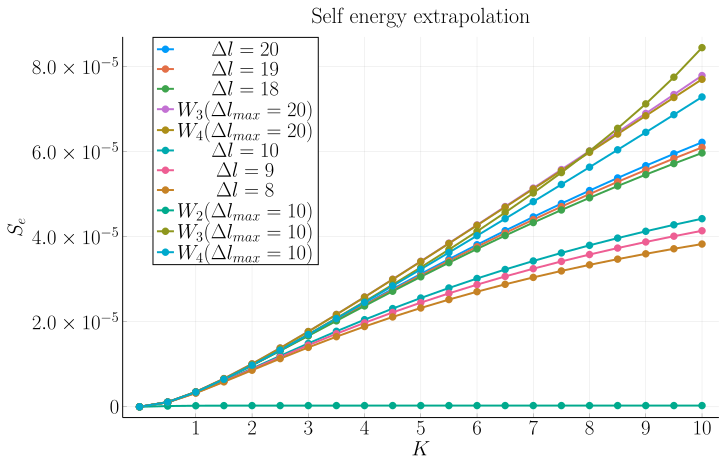

In [16]:
plotib0 = plot(
    0.0:0.5:10,
    [
        Dl_20_shell[:],
        Dl_19_shell[:],
        Dl_18_shell[:],
        W_3_20_shell[:],
        W_4_20_shell[:],
        W_Dl[:],
        W_Dl_m1[:],
        W_Dl_m2[:],
        W_2[:],
        W_3_10_shell[:],
        W_4_10_shell[:],
    ],
    label = [L"\Delta l = 20" L"\Delta l = 19" L"\Delta l = 18" L"W_3 (\Delta l_{max} = 20)" L"W_4 (\Delta l_{max} = 20)" L"\Delta l = 10" L"\Delta l = 9" L"\Delta l = 8" L"W_2  (\Delta l_{max} = 10)" L"W_3  (\Delta l_{max} = 10)" L"W_4  (\Delta l_{max} = 10)"],
    xlabel = L"K",
    ylabel = L"S_e",
    title = ["Self energy extrapolation"],
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 1:1:10,
    legend = (0.05, 1),
)

In [17]:
W_3_10_shell_check

21-element Vector{Float64}:
 0.0
 1.0901759030541198e-6
 3.4528316701689705e-6
 6.468383686699986e-6
 9.789138087623202e-6
 1.334084521506543e-5
 1.7024365989851108e-5
 2.082858930741271e-5
 2.4718744616975822e-5
 2.8702855093185228e-5
 3.27729251570518e-5
 3.694726087439983e-5
 4.1233864543314234e-5
 4.5660705834614253e-5
 5.025041081412103e-5
 5.504484486061408e-5
 6.008672594667387e-5
 6.544319325871059e-5
 7.119381530067813e-5
 7.745998134569364e-5
 8.440583935344484e-5

In [18]:
W_3_10_shell

21-element Vector{Float64}:
 0.0
 1.0901759030542612e-6
 3.4528316701686723e-6
 6.468383686699478e-6
 9.789138087622555e-6
 1.3340845215064948e-5
 1.7024365989850756e-5
 2.082858930741236e-5
 2.4718744616975507e-5
 2.8702855093185208e-5
 3.2772925157052025e-5
 3.6947260874399994e-5
 4.1233864543315094e-5
 4.56607058346141e-5
 5.025041081412054e-5
 5.5044844860611284e-5
 6.008672594666879e-5
 6.544319325871016e-5
 7.119381530067331e-5
 7.745998134569307e-5
 8.440583935343858e-5

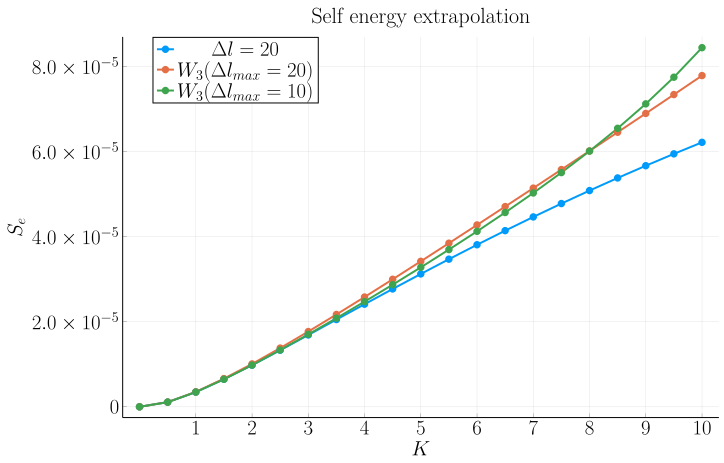

In [19]:
plotib0 = plot(
    0.0:0.5:10,
    [Dl_20_shell[:], W_3_20_shell[:], W_3_10_shell[:]],
    label = [L"\Delta l = 20" L"W_3 (\Delta l_{max} = 20)" L"W_3  (\Delta l_{max} = 10)"],
    xlabel = L"K",
    ylabel = L"S_e",
    title = ["Self energy extrapolation"],
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 1:1:10,
    legend = (0.05, 1),
)

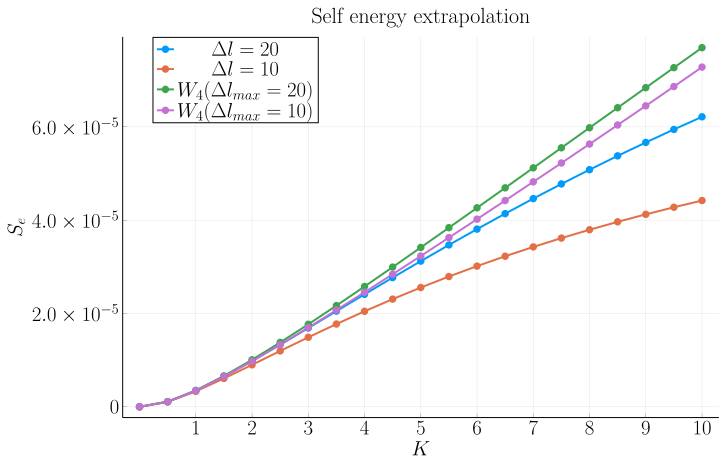

In [20]:
plotib0 = plot(
    0.0:0.5:10,
    [Dl_20_shell[:], W_Dl, W_4_20_shell[:], W_4_10_shell[:]],
    label = [L"\Delta l = 20" L"\Delta l = 10" L"W_4 (\Delta l_{max} = 20)" L"W_4  (\Delta l_{max} = 10)"],
    xlabel = L"K",
    ylabel = L"S_e",
    title = ["Self energy extrapolation"],
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 1:1:10,
    legend = (0.05, 1),
)

In [21]:
Diff_15_shell = zeros(21)
Diff_14_shell = zeros(21)
Diff_13_shell = zeros(21)

Diff_15_shell[1] = 0.0
Diff_14_shell[1] = 0.0
Diff_13_shell[1] = 0.0

Diff_15_shell[2] = data_20_shell[1, 16]
Diff_14_shell[2] = data_20_shell[1, 15]
Diff_13_shell[2] = data_20_shell[1, 14]

Diff_15_shell[3:end] = [data_20_shell[id, 16] - data_20_shell[id-1, 16] for id = 2:20]
Diff_14_shell[3:end] = [data_20_shell[id, 15] - data_20_shell[id-1, 15] for id = 2:20]
Diff_13_shell[3:end] = [data_20_shell[id, 14] - data_20_shell[id-1, 14] for id = 2:20];

W_3_15_shell_difference = zeros(21)

W_3_15_shell_difference .= (
    (Diff_15_shell[:] .* Diff_13_shell[:] .- Diff_14_shell[:] .^ 2) ./
    (Diff_15_shell[:] .- 2 .* Diff_14_shell[:] .+ Diff_13_shell[:])
);

W_3_15_shell_difference[1] = 0.0;

W_3_15_shell = zeros(21)

for k = 1:21
    W_3_15_shell[k] = sum(W_3_15_shell_difference[1:k])
end

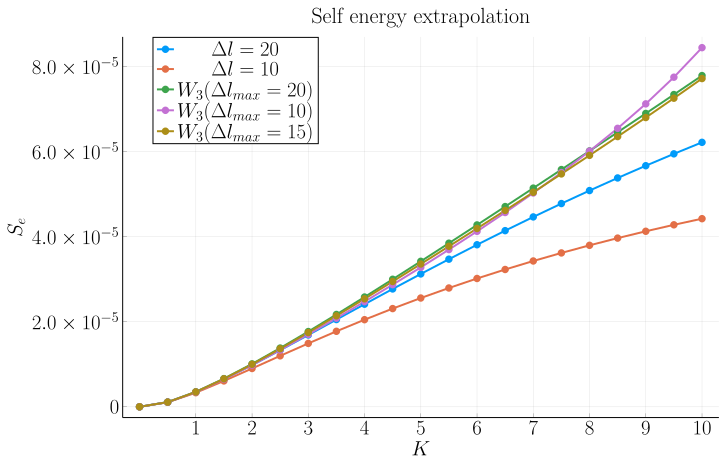

In [22]:
plotib0 = plot(
    0.0:0.5:10,
    [Dl_20_shell[:], W_Dl, W_3_20_shell[:], W_3_10_shell[:], W_3_15_shell[:]],
    label = [L"\Delta l = 20" L"\Delta l = 10" L"W_3 (\Delta l_{max} = 20)" L"W_3  (\Delta l_{max} = 10)" L"W_3  (\Delta l_{max} = 15)"],
    xlabel = L"K",
    ylabel = L"S_e",
    title = ["Self energy extrapolation"],
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 1:1:10,
    legend = (0.05, 1),
)

In [24]:
Diff_12_shell = zeros(21)
Diff_11_shell = zeros(21)
Diff_10_shell = zeros(21)

Diff_12_shell[1] = 0.0
Diff_11_shell[1] = 0.0
Diff_10_shell[1] = 0.0

Diff_12_shell[2] = data_20_shell[1, 13]
Diff_11_shell[2] = data_20_shell[1, 12]
Diff_10_shell[2] = data_20_shell[1, 11]

Diff_12_shell[3:end] = [data_20_shell[id, 13] - data_20_shell[id-1, 13] for id = 2:20]
Diff_11_shell[3:end] = [data_20_shell[id, 12] - data_20_shell[id-1, 12] for id = 2:20]
Diff_10_shell[3:end] = [data_20_shell[id, 11] - data_20_shell[id-1, 11] for id = 2:20];

W_3_12_shell_difference = zeros(21)

W_3_12_shell_difference .= (
    (Diff_12_shell[:] .* Diff_10_shell[:] .- Diff_11_shell[:] .^ 2) ./
    (Diff_12_shell[:] .- 2 .* Diff_11_shell[:] .+ Diff_10_shell[:])
);

W_3_12_shell_difference[1] = 0.0;

W_3_12_shell = zeros(21)

for k = 1:21
    W_3_12_shell[k] = sum(W_3_12_shell_difference[1:k])
end

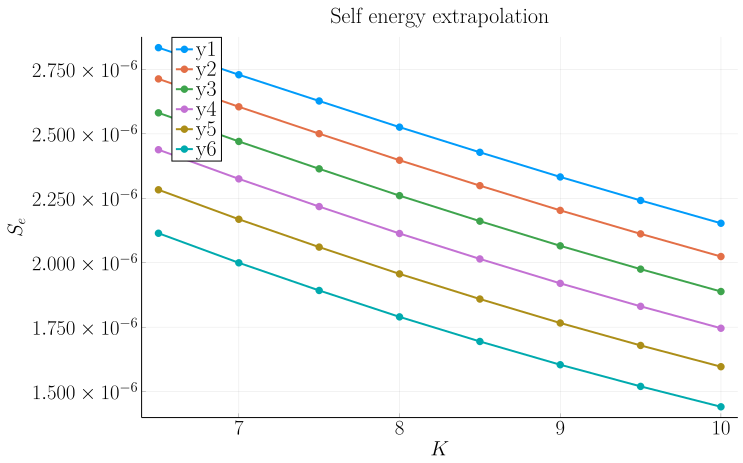

In [34]:
plotib0 = plot(
    6.5:0.5:10,
    [
        Diff_15_shell[14:end],
        Diff_14_shell[14:end],
        Diff_13_shell[14:end],
        Diff_12_shell[14:end],
        Diff_11_shell[14:end],
        Diff_10_shell[14:end],
    ],
    xlabel = L"K",
    ylabel = L"S_e",
    title = ["Self energy extrapolation"],
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 1:1:10,
    legend = (0.05, 1),
)

In [35]:
W_3_15_shell_difference = zeros(21)
W_3_14_shell_difference = zeros(21)
W_3_13_shell_difference = zeros(21)
W_3_12_shell_difference = zeros(21)


W_3_15_shell_difference .= (
    (Diff_15_shell[:] .* Diff_13_shell[:] .- Diff_14_shell[:] .^ 2) ./
    (Diff_15_shell[:] .- 2 .* Diff_14_shell[:] .+ Diff_13_shell[:])
);
W_3_14_shell_difference .= (
    (Diff_14_shell[:] .* Diff_12_shell[:] .- Diff_13_shell[:] .^ 2) ./
    (Diff_14_shell[:] .- 2 .* Diff_13_shell[:] .+ Diff_12_shell[:])
);
W_3_13_shell_difference .= (
    (Diff_13_shell[:] .* Diff_11_shell[:] .- Diff_12_shell[:] .^ 2) ./
    (Diff_13_shell[:] .- 2 .* Diff_12_shell[:] .+ Diff_11_shell[:])
);
W_3_12_shell_difference .= (
    (Diff_12_shell[:] .* Diff_10_shell[:] .- Diff_11_shell[:] .^ 2) ./
    (Diff_12_shell[:] .- 2 .* Diff_11_shell[:] .+ Diff_10_shell[:])
);

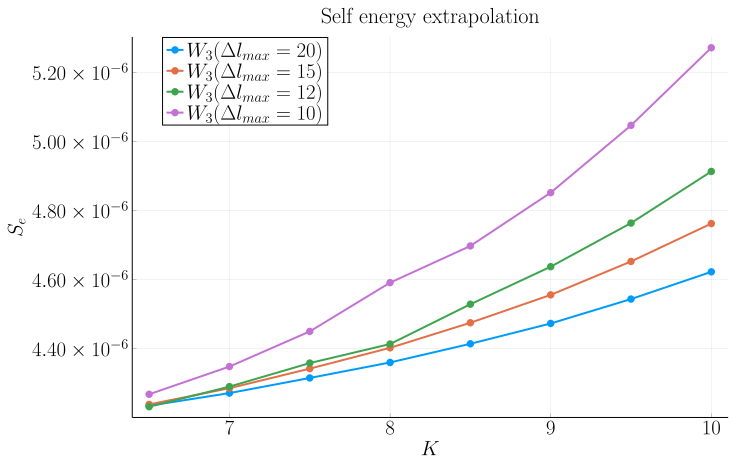

In [36]:
plotib0 = plot(
    6.5:0.5:10,
    [
        W_3_15_shell_difference[14:end],
        W_3_14_shell_difference[14:end],
        W_3_13_shell_difference[14:end],
        W_3_12_shell_difference[14:end],
    ],
    label = [L"W_3 (\Delta l_{max} = 20)" L"W_3  (\Delta l_{max} = 15)" L"W_3  (\Delta l_{max} = 12)" L"W_3 (\Delta l_{max} = 10)"],
    xlabel = L"K",
    ylabel = L"S_e",
    title = ["Self energy extrapolation"],
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 1:1:10,
    legend = (0.05, 1),
)

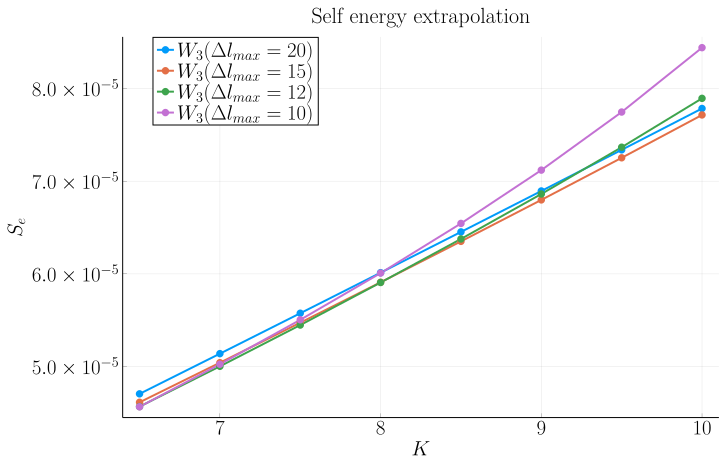

In [32]:
plotib0 = plot(
    6.5:0.5:10,
    [
        W_3_20_shell[14:end],
        W_3_15_shell[14:end],
        W_3_12_shell[14:end],
        W_3_10_shell[14:end],
    ],
    label = [L"W_3 (\Delta l_{max} = 20)" L"W_3  (\Delta l_{max} = 15)" L"W_3  (\Delta l_{max} = 12)" L"W_3 (\Delta l_{max} = 10)"],
    xlabel = L"K",
    ylabel = L"S_e",
    title = ["Self energy extrapolation"],
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 1:1:10,
    legend = (0.05, 1),
)

In [15]:
data_20_shell

20×21 Matrix{Float64}:
 3.13088e-7  6.01666e-7  7.7747e-7   …  1.09089e-6  1.09242e-6  1.09375e-6
 7.54167e-7  1.58562e-6  2.16914e-6     3.45112e-6  3.45889e-6  3.46567e-6
 1.11382e-6  2.49929e-6  3.58052e-6     6.44778e-6  6.46902e-6  6.48764e-6
 1.38532e-6  3.2556e-6   4.83134e-6     9.71657e-6  9.75936e-6  9.79705e-6
 1.59358e-6  3.87746e-6  5.91778e-6     1.31621e-5  1.32356e-5  1.33006e-5
 1.75527e-6  4.38634e-6  6.84642e-6  …  1.66665e-5  1.67795e-5  1.68799e-5
 1.8837e-6   4.80787e-6  7.64386e-6     2.01962e-5  2.03578e-5  2.05019e-5
 1.9873e-6   5.15945e-6  8.32906e-6     2.36984e-5  2.39167e-5  2.41122e-5
 2.07234e-6  5.45623e-6  8.92227e-6     2.71589e-5  2.74417e-5  2.76958e-5
 2.14305e-6  5.70875e-6  9.43797e-6     3.05513e-5  3.09055e-5  3.12248e-5
 2.20263e-6  5.92575e-6  9.88952e-6  …  3.38701e-5  3.43019e-5  3.46925e-5
 2.25334e-6  6.11358e-6  1.02868e-5     3.71021e-5  3.76169e-5  3.8084e-5
 2.29695e-6  6.27748e-6  1.06385e-5     4.02462e-5  4.08488e-5  4.13971e-5
 2.

# Why $W_3$ overestimates at $\Delta l=10$ ?

Let's compute $W(K)-W(K-0.5)$ for each $\Delta l$:

In [79]:
# FIRST ENTRY: K
# SECOND ENTRY: Dl

W_K_diff = zeros(21, 21)
W_K_diff[1, :] .= 0.0 # convention
W_K_diff[2, :] .= data_20_shell[1, :];

for k_index = 2:20
    W_K_diff[k_index+1, :] .= data_20_shell[k_index, :] .- data_20_shell[k_index-1, :]
end

Let's now evaluate the coefficient $c_K$ for $k=10$ with the difference of amplitudes:

In [94]:
c = zeros(20)

for l = 3:20
    k = 21
    c[l] = (W_K_diff[k, l] - W_K_diff[k, l-1]) / (W_K_diff[k, l-1] - W_K_diff[k, l-2])
end

20-element Vector{Float64}:
 0.0
 0.0
 1.727640278047113
 1.3168756686141578
 1.1734341444213856
 1.087154976519295
 1.0443580853628105
 1.012593345134188
 0.9949106853097355
 0.9800910649330092
 0.97151707754811
 0.96376809910912
 0.9593884816161194
 0.9550020868485377
 0.9527519188657434
 0.9503360198567157
 0.9492268254260301
 0.9479066677187624
 0.9474925647260074
 0.946841653481598

It is *decreasing* as a function of $\Delta l$.

This is the same coefficient $c_K$ computed in the self-energy paper:

In [88]:
c = zeros(20)

for l = 3:20
    k = 19
    c[l] =
        (data_20_shell[k, l] - data_20_shell[k, l-1]) /
        (data_20_shell[k, l-1] - data_20_shell[k, l-2])
end

In [ ]:
plot(3:20,c[3:end])

20-element Vector{Float64}:
 0.0
 0.0
 1.1557430439755603
 0.9776782876463804
 0.9430250536614099
 0.9172710835194725
 0.9120426077574246
 0.9054198080526648
 0.9058121602088739
 0.9043643135805906
 0.9062246111108919
 0.9066475642870854
 0.9090001470246241
 0.9100150350033891
 0.9124139939270621
 0.9138540758052055
 0.9160981669676106
 0.9176260410886776
 0.9197343129546013
 0.9212567647011873

This is increasing, therefore the extrapolation is a lower bound!